# Homework 2. Exploratory Data Analysis


---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [4]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
# importing libraries for you'll need for this homework

## Problem 1

In class, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Download [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) into the same directory as this notebook. For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the first few lines of each table using the head method on each table.


In [3]:
Salaries_df = pd.read_csv('Salaries.csv')
Salaries_df.head(10)
#Salaries_df.shape

,yearID,teamID,lgID,playerID,salary
0,1985,BAL,AL,murraed02,1472819
1,1985,BAL,AL,lynnfr01,1090000
2,1985,BAL,AL,ripkeca01,800000
3,1985,BAL,AL,lacyle01,725000
4,1985,BAL,AL,flanami01,641667
5,1985,BAL,AL,boddimi01,625000
6,1985,BAL,AL,stewasa01,581250
7,1985,BAL,AL,martide01,560000
8,1985,BAL,AL,roeniga01,558333
9,1985,BAL,AL,mcgresc01,547143


In [4]:
Teams_df = pd.read_csv('Teams.csv')
Teams_df.head(10)
#Teams_df.shape

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,PH1,PNA,NaN,1,28,NaN,21,7,...,NaN,0.84,Philadelphia Athletics,Jefferson Street Grounds,NaN,102,98,ATH,PH1,PH1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
3,1871,NaN,WS3,OLY,NaN,4,32,NaN,15,15,...,NaN,0.85,Washington Olympics,Olympics Grounds,NaN,94,98,OLY,WS3,WS3
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
5,1871,NaN,TRO,TRO,NaN,6,29,NaN,13,15,...,NaN,0.84,Troy Haymakers,Haymakers' Grounds,NaN,101,100,TRO,TRO,TRO
6,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
7,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
8,1871,NaN,RC1,ROK,NaN,9,25,NaN,4,21,...,NaN,0.82,Rockford Forest Citys,Agricultural Society Fair Grounds,NaN,97,99,ROK,RC1,RC1
9,1872,NaN,BS1,BNA,NaN,1,48,NaN,39,8,...,NaN,0.87,Boston Red Stockings,South End Grounds I,NaN,105,100,BOS,BS1,BS1


#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [18]:
Total_sala = Salaries_df.groupby(['yearID','teamID']).sum()

#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

To merge these two DataFrames, we can use the `merge` function to join together DataFrame objects `on` a set of column names (must be found in both DataFrames) and `how` (union, intersection, only rows from one data set or the other). Below, we use the arguments `how="inner"` to take the intersection of the rows and `on=['yearID', 'teamID']` the column names `yearID` and `teamID` which can be found in both DataFrames. 

In [19]:
merged_df = pd.merge(left=Total_sala, right=Teams_df, how = 'inner', on=['yearID', 'teamID'])
merged_df

,yearID,teamID,salary,lgID,franchID,divID,Rank,G,Ghome,W,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1985,ATL,14807000,NL,ATL,W,5,162,81.0,66,...,197.0,0.970,Atlanta Braves,Atlanta-Fulton County Stadium,1350137.0,105,106,ATL,ATL,ATL
1,1985,BAL,11560712,AL,BAL,E,4,161,81.0,83,...,168.0,0.980,Baltimore Orioles,Memorial Stadium,2132387.0,97,97,BAL,BAL,BAL
2,1985,BOS,10897560,AL,BOS,E,5,163,81.0,81,...,161.0,0.970,Boston Red Sox,Fenway Park II,1786633.0,104,104,BOS,BOS,BOS
3,1985,CAL,14427894,AL,ANA,W,2,162,79.0,90,...,202.0,0.980,California Angels,Anaheim Stadium,2567427.0,100,100,CAL,CAL,CAL
4,1985,CHA,9846178,AL,CHW,W,3,163,81.0,85,...,152.0,0.980,Chicago White Sox,Comiskey Park,1669888.0,104,104,CHW,CHA,CHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,2013,SLN,92260110,NL,STL,C,1,162,81.0,97,...,177.0,0.988,St. Louis Cardinals,Busch Stadium III,3369769.0,99,97,STL,SLN,SLN
824,2013,TBA,52955272,AL,TBD,E,2,163,81.0,92,...,147.0,0.990,Tampa Bay Rays,Tropicana Field,1510300.0,96,95,TBR,TBA,TBA
825,2013,TEX,112522600,AL,TEX,W,2,163,82.0,91,...,146.0,0.986,Texas Rangers,Rangers Ballpark in Arlington,3178273.0,104,103,TEX,TEX,TEX
826,2013,TOR,126288100,AL,TOR,E,5,162,81.0,74,...,144.0,0.982,Toronto Blue Jays,Rogers Centre,2536562.0,102,102,TOR,TOR,TOR


#### Problem 1(d)

Explore the relationship between wins and salaries.  How would you graphically display the relationship between total wins and total salaries for a range of years? What kind of plot would be best? 

Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 


Step 1:  Subset the dataset describing the salaries of all teams in the year 2000 and assign it to a variable, like, 'salaries'.   Also, subset the number of wins, assigning it to an appropriate variable.

Step 2:  Make a plot to show the data for all teams.  BONUS:  Can you annotate the Oakland team datapoint?  [Hint](https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/annotation_demo.html)

Example:
```
plt.annotate('OAK', xy=(salaries_oakland, total_wins_oakland), xycoords='data')
```

Step 3:  Use a `for` loop to consider multiple years. The following command might be helpful.

```
years = np.arange(2000, 2004)
```

Write a *for loop* and appropriate variables to generate the same plot for all 4 years.  

Make a scatterplot of wins as a funciton of salary for the year 2000.  Hint:  You may want to divide this by 1e6, so that when you plot these values it is more readable.  Add a title and axis labels.  You can also add a grid to your plot with the plt.grid() method from matplotlib.  

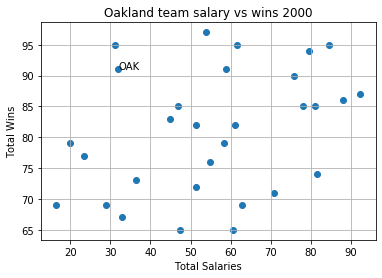

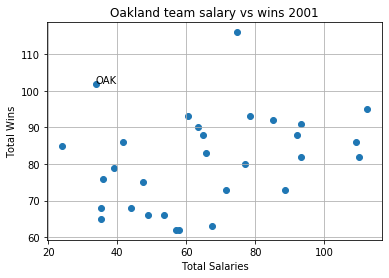

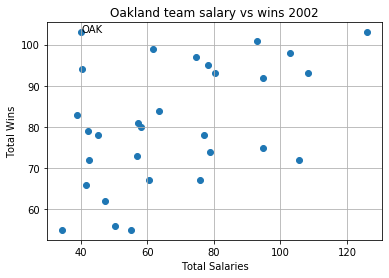

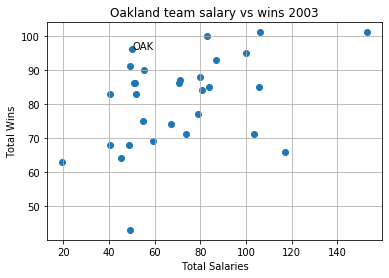

In [34]:
df = merged_df
years = np.arange(2000, 2004)
for year in years:
    df_sub = df[df['yearID'] == year]
    df_oak = df_sub[df_sub['teamID'] == 'OAK']
    df_oak.head()
    sala = df[df['yearID'] == year]['salary']/ 1e6
    win = df[df['yearID'] == year]['W']
    sala_oak = df_oak['salary']/ 1e6
    sala_oak
    total_wins_oakland = df_oak['W']
    total_wins_oakland
    plt.scatter(sala, win)
    plt.annotate('OAK', xy=(sala_oak, total_wins_oakland), xycoords='data')
    plt.title('Oakland team salary vs wins '+ str(year))
    plt.xlabel('Total Salaries')
    plt.ylabel('Total Wins')
    plt.grid()
    plt.show()

We see a competitive advantage can be detected in years 2001-2003 for the Oakland baseball team, because in those years Oakland spent much less in salary compared to other teams, but stood out with the number of wins.  

#### BONUS:  Problem 1(e):

Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

Step 1:

You will want to first know how to find a least squares solution to this problem.  We did not directly cover this in class, but let's see if you can practice reading some documentation for Python's numpy package and the [linear algebra methods](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html).

Note in the example, that you must convert your two datasets for linear correlation into a numpy array in order to use these methods and the example walks you through that.  The output of this method is the slope and intercept to calculate the theoretical estimate.

*Hint:  To convert your pandas dataframe data types to values you can use the `.values` method in pandas.  e.g., df['salary'].values.*

Step 2:

You will want to next calculate the residuals for each team, the difference of teh observed value minus the theoretical.  

$$e_i = y_i - \hat{y}_i$$

Step 3. 

Store the residuals as a data frame where values are categorized by year.  (Hint:  you may want to initiate an empty data frame to store this data in).  Make sure that the index for each data frame is appropriate for the dataset and represents the teamID.

Step 4.

Plot the residuals for each team across time. 


For each year, we perform the following: 

1. Calculate the least squares estimate of the coefficients in a linear regression model where x = salaries (in millions) and y = total wins.  

Hint:  One way to 
2. Calculate the residuals for each team: $$e_i = y_i - \hat{y}_i$$
3. Plot the residuals for each team across time. 

To 

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

Considering the plots from 1(d) and potentially 1(e) (bonus), we see the Oakland baseball team stood out amongst the other baseball teams in terms of their ability to win a large amount of games with a small budget from 2001-2003.  Upon futher reading, we can attributed this to Billy Beane's effort to use "sabermetrics" (or the empirical analysis of baseball data) at the Oakland A's. He was able to find the most undervalued players and baseball and hire them on a reduced budget.  

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [43]:
url="https://raw.githubusercontent.com/cs109/2014_data/master/countries.csv"
countries=pd.read_csv(url, sep=",")
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.  The spreadsheet contains the GDP per capita for each country by year.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [14]:
income=pd.read_excel("indicator gapminder gdp_per_capita_ppp.xlsx", sheet_name = "Data")
income.head()

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
4,Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

Here we use a histogram to plot the distribution of income per person in a given year across all the countries on the dollar scale and the log10(dollar) scale. 

In [22]:
income.index = income.iloc[:,0]
income.drop('GDP per capita', axis = 1)
income = income.transpose() #transpose
#income.columns
income.head()

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,NaN,NaN
GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,NaN,NaN
1800,NaN,603,NaN,667,716,NaN,1197,618,NaN,757,...,NaN,NaN,877,NaN,663,869,NaN,507,NaN,NaN
1801,NaN,603,NaN,667,716,NaN,1199,620,NaN,757,...,NaN,NaN,879,NaN,665,870,NaN,507,NaN,NaN
1802,NaN,603,NaN,668,717,NaN,1201,623,NaN,757,...,NaN,NaN,882,NaN,667,871,NaN,507,NaN,NaN
1803,NaN,603,NaN,668,718,NaN,1204,626,NaN,757,...,NaN,NaN,884,NaN,668,872,NaN,507,NaN,NaN


In [49]:

income.drop('GDP per capita')
income.index

Index(['GDP per capita',             1800,             1801,             1802,
                   1803,             1804,             1805,             1806,
                   1807,             1808,
       ...
                   2006,             2007,             2008,             2009,
                   2010,             2011,             2012,             2013,
                   2014,             2015],
      dtype='object', length=217)

In [34]:
year = 2000
income_2000 = income.loc[year]
income_2000

GDP per capita
Abkhazia                  NaN
Afghanistan               962
Akrotiri and Dhekelia     NaN
Albania                  5305
Algeria                  9885
                         ... 
Zimbabwe                 2521
Åland                     NaN
South Sudan              2684
NaN                       NaN
NaN                       NaN
Name: 2000, Length: 262, dtype: object

Text(0.5, 1.0, 'Year 2000 income per person')

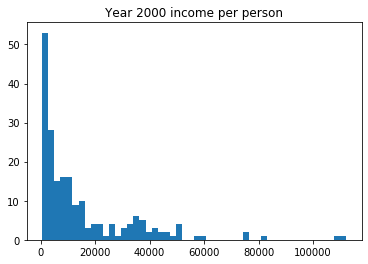

In [26]:
plt.hist(income_2000.dropna().values, bins = 50)
plt.title('Year 2000 income per person')

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [50]:

def mergeByYear(year):
    data = pd.DataFrame()
    data['income'] = income.loc[year]
    data['Country'] = income.columns
    data.reset_index()
    joined = pd.merge(data,countries, how="inner", on=['Country'])
    #joined.income = np.round(joined.income, 2)
    return joined

In [68]:
test=mergeByYear(2001)
test['income'].dtype

dtype('O')

#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

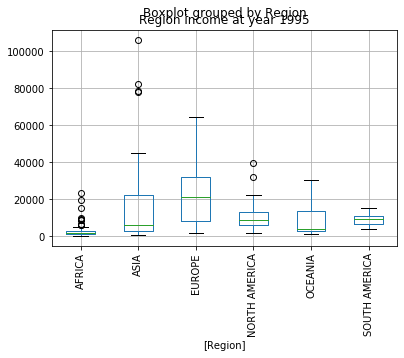

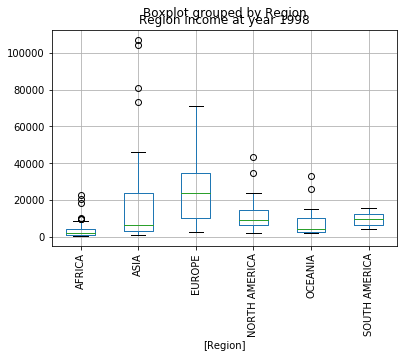

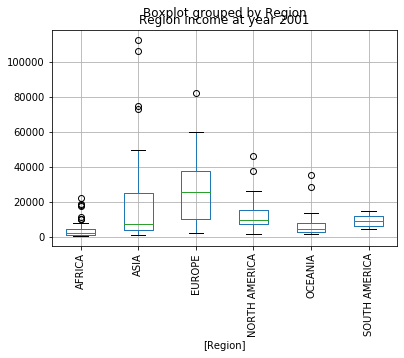

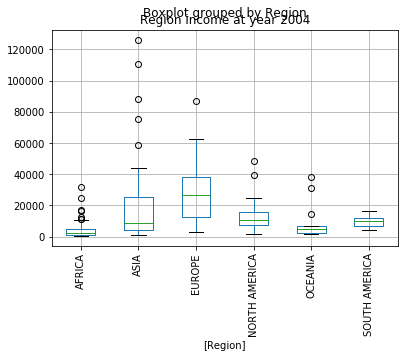

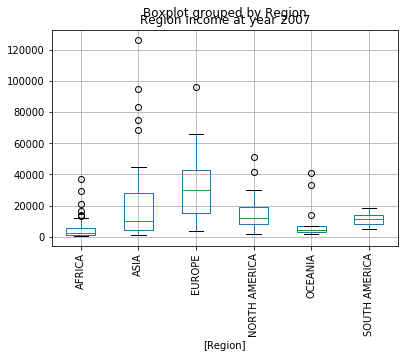

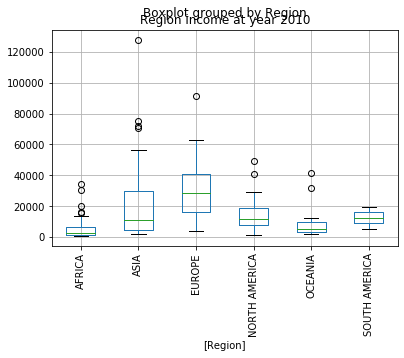

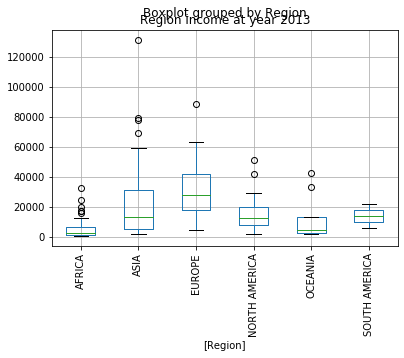

In [70]:
years = range(1995,2015,3)
for year in years:
    df = mergeByYear(year)
    df['income'] = pd.to_numeric(df['income'])
    df.boxplot(by='Region',rot = 90)
    plt.title('Region income at year '+str(year) )

In recent years, Africa and Asia have an upwards trend in average income per person while other continents have stayed more constant through the 20th century. 

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

In most continents (especially Africa and Asia), we see that the distribution of incomes is very skewed: most countries are in a group of low-income states with a fat tail of high-income countries that remains approximately constant throughout the 20th century.  In 2(b) we used a histogram to look at the income distribution of all countries in the world for a given year saw a non-normal distribution. In 2(d) we used boxplots to take a closer look at the income distribution of countries grouped by regions across decades.  We saw upward trends in average income per person across certain regions (e.g. Africa) as we moved through the 20th century.

---


## Problem 3: Is the average of polls better than just one poll?


The [HuffPost Pollster](http://elections.huffingtonpost.com/pollster) contains many political polls. You can access these polls from individual races as a CSV but you can also access polls through the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to access the data.  

Read in the polls from the [2012 Presidential Election: Barack Obama vs Mitt Romney](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama) into a pandas DataFrame called `election`. For this problem, you may read in the polls for this race directly using [the CSV file](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv) available from the HuffPost Pollster page.

How much do you put faith into pollsters data for the election?

One way to do this is to look at the average of polls and compare this to the average of just one poll.

How would we go about that?  We have poll data from varying days before the election, so a practical strategy might be to look at data within a certain time window.  

In [ ]:
### Problem 3a.  

Load the data and subset data from November and then for 5 days before the election.  You will need to use likely some module that deals with dates and time and dive into some documentation to know how to use it.

In [5]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
election = pd.read_csv(url, sep = ",")
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [6]:
election["Diff"] = (election.Obama / 100) - (election.Romney / 100)
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Diff
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


Filter out election results from November.

In [8]:
election['Start Date'] = pd.to_datetime(election['Start Date'])
election['Start Month'] = election['Start Date'].apply(lambda x: x.month)
election['Start Year'] = election['Start Date'].apply(lambda x: x.year)
election['Start Day'] = election['Start Date'].apply(lambda x: x.day)
filtered = election[(election['Start Month'] == 11) & (election['Start Year'] == 2012)]
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,...,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Diff,Start Month,Start Year,Start Day
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,...,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00,11,2012,4
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,...,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02,11,2012,3
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,...,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00,11,2012,3
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,...,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01,11,2012,3
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,...,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01,11,2012,3


In [9]:
last_day = max(election['Start Date'])
election['days_between'] = (last_day -  election['Start Date']).dt.days
election.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,...,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Diff,Start Month,Start Year,Start Day,days_between
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00,11,2012,4,0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02,11,2012,3,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00,11,2012,3,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01,11,2012,3,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01,11,2012,3,1


In [13]:
fs = election[(election['days_between'] <= 5)] # subset for 5 days
fs

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,...,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Diff,Start Month,Start Year,Start Day,days_between
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00,11,2012,4,0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02,11,2012,3,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00,11,2012,3,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01,11,2012,3,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01,11,2012,3,1
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1,0.00,11,2012,3,1
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,...,NaN,Nonpartisan,None,NaN,1,0.01,11,2012,3,1
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1,0.02,11,2012,1,3
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1,0.00,11,2012,2,2
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1,0.02,11,2012,2,2


### Problem 3(b)
Make a plot of the differences for the week before the election (e.g. 5 days) where the days are on the x-axis and the differences are on the y-axis. 

Text(0.5, 0, 'days to election')

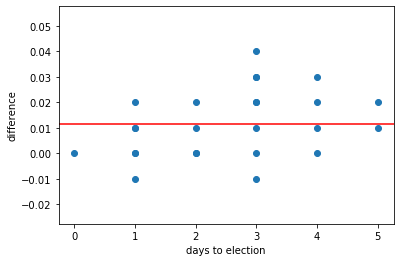

In [25]:
plt.scatter(fs['days_between'], fs['Diff'])
plt.axhline(y = np.mean(fs['Diff']), c = "red")
plt.ylabel('difference')
plt.xlabel('days to election')

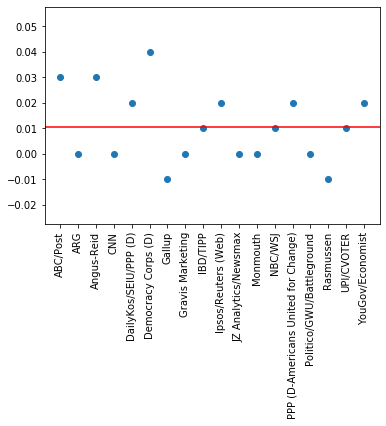

In [23]:
aggr  = filtered.groupby('Pollster').mean()
plt.scatter(aggr.index,aggr['Diff'])
plt.xticks(rotation = 90)
plt.axhline(y = np.mean(aggr['Diff']), c = "red")

### Problem 3(c)

Is the across poll difference larger than the between pollster difference?

For this question, we can compare the variability within each pollster (across a set of polls) compared to the variability between each pollster. From these two visualization, is the pollster difference small or large?

Make a plot showing the differences by pollster where the pollsters are on the x-axis and the differences on the y-axis.  Compute the average for each pollster and then compute the average of that.  Draw this line on the plot.

Calculate the average difference across pollsters and the standard error?

In [40]:
avg_diff = np.mean(aggr['Diff'])
std = np.std(aggr['Diff'])
print(avg_diff, std)

0.01055555555555556 0.013933262448871617


### Proble 3(d): 

How much do you put faith into pollsters data for the election?  Problem 3: Is the average of polls better than just one poll?


I think this data set is reliable and esay to work with. The original data was very well orginzed and coming with source for data.
The average polls is better than just one poll. when looking at the graph we can see that the data for different pollsters were evenly distributed along the average line, and the standard deviation was small. This means the mean valuse is a good representation of the whole data.
